Global minimum for f(x) = x^2 - 2x + 2: 0.9950049160952338
Number of iterations for 1D function: 2647
Global minimum for f(x, y) = (1 - x)^2 + 100(y - x^2)^2: (0.9876022892416212, 0.9753082998350543)
Number of iterations for 2D function: 8037


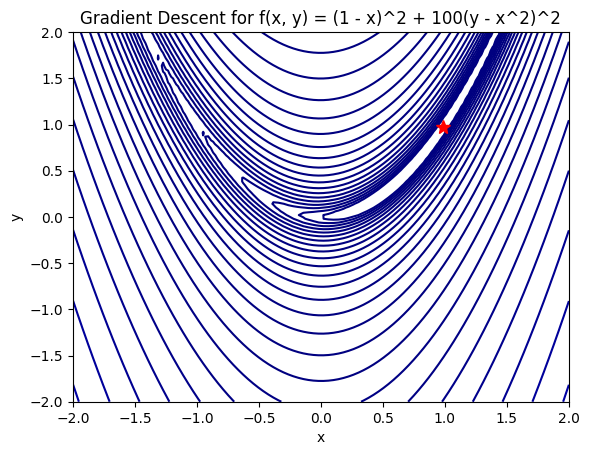

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function definitions
def f1(x):
    return x**2 - 2*x + 2

def f2(x, y):
    return (1 - x)**2 + 100*(y - x**2)**2

def gradient_descent_1d(learning_rate, initial_x, max_iterations, tolerance):
    x = initial_x
    iterations = 0
    while True:
        gradient = 2*x - 2
        new_x = x - learning_rate * gradient
        if abs(new_x - x) < tolerance:
            break
        x = new_x
        iterations += 1
        if iterations >= max_iterations:
            break
    return x, iterations

def gradient_descent_2d(learning_rate, initial_x, initial_y, max_iterations, tolerance):
    x = initial_x
    y = initial_y
    iterations = 0
    while True:
        grad_x = 400*x**3 - 400*x*y + 2*x - 2
        grad_y = 200*(y - x**2)
        new_x = x - learning_rate * grad_x
        new_y = y - learning_rate * grad_y
        if abs(new_x - x) < tolerance and abs(new_y - y) < tolerance:
            break
        x = new_x
        y = new_y
        iterations += 1
        if iterations >= max_iterations:
            break
    return (x, y), iterations

# Initial values and hyperparameters
initial_x = 0
initial_y = 0
learning_rate = 0.001
max_iterations = 10000
tolerance = 1e-5

# Perform gradient descent for function f1
minima_1d, iterations_1d = gradient_descent_1d(learning_rate, initial_x, max_iterations, tolerance)

# Perform gradient descent for function f2
minima_2d, iterations_2d = gradient_descent_2d(learning_rate, initial_x, initial_y, max_iterations, tolerance)

# Print results
print("Global minimum for f(x) = x^2 - 2x + 2:", minima_1d)
print("Number of iterations for 1D function:", iterations_1d)
print("Global minimum for f(x, y) = (1 - x)^2 + 100(y - x^2)^2:", minima_2d)
print("Number of iterations for 2D function:", iterations_2d)

# Visualize results
x_vals = np.linspace(-2, 2, 100)
y_vals = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f2(X, Y)

plt.contour(X, Y, Z, levels=np.logspace(0, 5, 35), cmap='jet')
plt.plot(minima_2d[0], minima_2d[1], 'r*', markersize=10)
plt.title('Gradient Descent for f(x, y) = (1 - x)^2 + 100(y - x^2)^2')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
